In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("iris.csv") #load the dataset
data.drop('Id',axis=1,inplace=True)
# Se elimina la columna no requerida
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

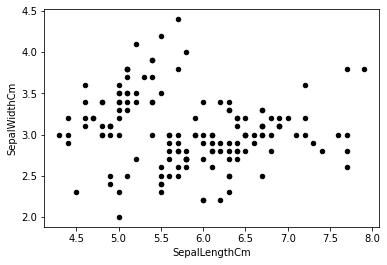

In [3]:
X_train = data[["SepalLengthCm", "SepalWidthCm"]]
X_train.plot.scatter(x="SepalLengthCm", y="SepalWidthCm", 
                     c="black")

,SepalLengthCm,SepalWidthCm
r,6.5,3.2
b,5.0,2.3
y,4.9,3.1


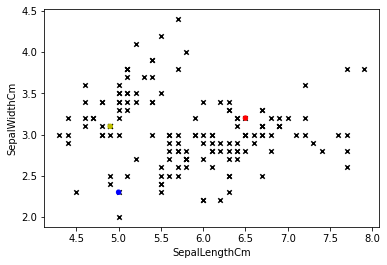

In [4]:
k=3
centroids = X_train.sample(k)

# Call the three clusters "red", "blue", "yellow" for convenience.
centroids.index = ["r", "b", "y"]

# Plot these centroids.
ax = X_train.plot.scatter(x="SepalLengthCm", y="SepalWidthCm", 
                          c="black", marker="x")
centroids.plot.scatter(x="SepalLengthCm", y="SepalWidthCm", 
                       c=centroids.index, ax=ax)

centroids

In [5]:
def get_nearest_centroid(obs):
    dists = np.sqrt(((obs - centroids) ** 2).sum(axis=1))
    return dists.idxmin()

get_nearest_centroid(X_train.loc[0])

'y'

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

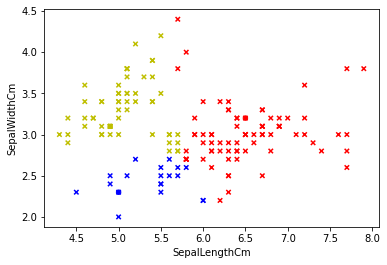

In [6]:
clusters = X_train.apply(get_nearest_centroid, axis=1)

# Plot the cluster assignments.
ax = X_train.plot.scatter(x="SepalLengthCm", y="SepalWidthCm", 
                          c=clusters, marker="x")
centroids.plot.scatter(x="SepalLengthCm", y="SepalWidthCm", 
                       c=centroids.index, ax=ax)

,SepalLengthCm,SepalWidthCm
b,5.394737,2.431579
r,6.510526,3.017105
y,5.076364,3.320000


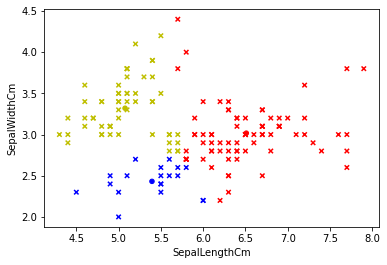

In [7]:
# Calculate the mean length and width for each cluster.
centroids = X_train.groupby(clusters).mean()

# Let's plot the new centroids.
ax = X_train.plot.scatter(x="SepalLengthCm", y="SepalWidthCm", 
                          c=clusters, marker="x")
centroids.plot.scatter(x="SepalLengthCm", y="SepalWidthCm", 
                       c=centroids.index, ax=ax)

centroids

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

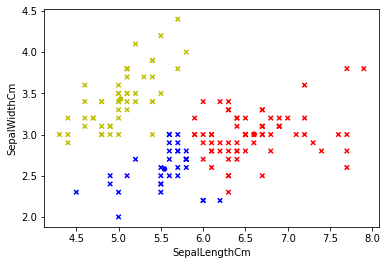

In [8]:
# Assign points to their nearest centroid.
clusters = X_train.apply(get_nearest_centroid, axis=1)

# Recalculate the centroids based on the clusters.
centroids = X_train.groupby(clusters).mean()

# Plot the current cluster assignments and the centroids.
ax = X_train.plot.scatter(x="SepalLengthCm", y="SepalWidthCm", 
                          c=clusters, marker="x")
centroids.plot.scatter(x="SepalLengthCm", y="SepalWidthCm", 
                       c=centroids.index, ax=ax)